# **Reconocimiento de números escritos**
En este cuaderno, construiremos una red neuronal que reconozca los números escritos del 0 al 9.

Este tipo de red neuronal se utiliza en una variedad de aplicaciones del mundo real, incluyendo: el reconocimiento de números de teléfono y la clasificación del correo postal por dirección. Para construir la red, utilizaremos el conjunto de datos MNIST, que consiste en imágenes de números escritos a mano y sus etiquetas correctas del 0 al 9.

Utilizaremos keras, una biblioteca de alto nivel construida sobre TensorFlow para construir la red neuronal. Empezaremos importando todos los módulos que necesitaremos, luego cargaremos los datos y finalmente construiremos la red.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from tensorflow.keras.optimizers import SGD

# **Preparación de los datos de entrenamiento y de prueba**

El conjunto de datos MNIST ya contiene datos de entrenamiento y de prueba. Hay 55.000 puntos de datos de entrenamiento y 10.000 puntos de datos de prueba.

Cada punto de datos MNIST tiene una imagen de un dígito escrito a mano y
una etiqueta correspondiente (un número 0-9 que identifica la imagen)
Llamaremos a las imágenes, que serán la entrada de nuestra red neuronal, X y a sus correspondientes etiquetas Y.

Vamos a querer que nuestras etiquetas sean vectores de un solo punto, es decir, vectores que contienen mayoritariamente 0 y un 1. Es más fácil ver esto en un ejemplo. Como un vector de un solo golpe, el número 0 se representa como [1, 0, 0, 0, 0, 0, 0, 0, 0], y 4 se representa como [0, 0, 0, 0, 1, 0, 0, 0, 0].


# Datos aplanados (Flatten)
Para este ejemplo, utilizaremos datos aplanados o una representación de las imágenes MNIST en una dimensión en lugar de dos. Así, cada imagen de números escritos a mano, que tiene 28x28 píxeles, se representará como una matriz unidimensional de 784 valores de píxeles.

El aplanamiento de los datos elimina la información sobre la estructura 2D de la imagen, pero simplifica nuestros datos para que todos los datos de entrenamiento puedan estar contenidos en una matriz cuya forma es [55000, 784]; la primera dimensión es el número de imágenes de entrenamiento y la segunda el número de píxeles de cada imagen. Este es el tipo de datos que es fácil de analizar utilizando una red neuronal simple.

In [36]:
# Cargamos los datos de train y test
(trainX, trainY), (testX, testY) = mnist.load_data()

In [58]:
# Suponiendo que trainX y testX contienen tus datos de entrenamiento y prueba

# Aplanar las imágenes
trainX_flat = trainX.reshape(trainX.shape[0], -1)
testX_flat = testX.reshape(testX.shape[0], -1)
testY_flat = testY.reshape(testX.shape[0], -1)

# Asegúrate de que las dimensiones sean correctas
print(trainX_flat.shape)  # Debería imprimir (número_de_muestras, 784)
print(testX_flat.shape)   # Debería imprimir (número_de_muestras, 784)

# Ahora puedes usar trainX_flat y testX_flat como entradas para tu red neuronal

(60000, 784)
(10000, 784)


In [44]:
# Suponiendo que 'y_train' contiene tus etiquetas
y_train_one_hot = tf.keras.utils.to_categorical(trainY, num_classes=10)

**Introducir el código necesario para visualizar el tamaño de los datos obtenidos**

In [46]:
# Supongamos que 'trainX_flat' y 'trainY' son tus datos de entrenamiento
# y 'testX_flat' y 'y_test' son tus datos de prueba.

# Obtén las dimensiones de los conjuntos de datos
train_size = trainX_flat.shape[0]
test_size = testX_flat.shape[0]
input_shape = trainX_flat.shape[1:]

# Imprime los tamaños
print(f'Tamaño del conjunto de entrenamiento: {train_size} muestras')
print(f'Tamaño del conjunto de prueba: {test_size} muestras')
print(f'Dimensiones de las características de entrada: {input_shape}')

# Si tienes etiquetas
num_classes = len(set(trainY))  # Asumiendo que las etiquetas son categóricas
print(f'Número de clases: {num_classes}')



Tamaño del conjunto de entrenamiento: 60000 muestras
Tamaño del conjunto de prueba: 10000 muestras
Dimensiones de las características de entrada: (784,)
Número de clases: 10


# **Visualizar los datos de entrenamiento**
A continuación se presenta una función que le ayudará a visualizar los datos de MNIST. Al pasar el índice de un ejemplo de entrenamiento, la función show_digit mostrará esa imagen de entrenamiento junto con su correspondiente etiqueta en el título.

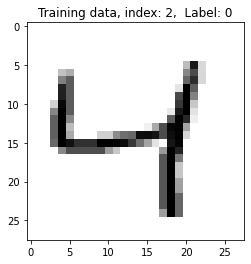

In [ ]:
#Función para visualizar los datos que acabamos de cargar
def display_digit(index):
    label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = trainX_flat[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()

# Visualizamos el dígito que queramos pasando una posicióndel array
display_digit(2)

# **Construir la red**
Keras te permite construir la red definiendo las capas de la misma.

Para este ejemplo, hay que definir:
  

1.   La capa de entrada, que indica a la red el número de entradas que debe esperar para cada dato MNIST.
2.   Las capas ocultas, que reconocen patrones en los datos y conectan la entrada con la capa de salida
3.   La capa de salida, que define cómo la red aprende y emite una etiqueta para una imagen determinada.


Empecemos por la capa de entrada; para definir la capa de entrada, se definirá el tipo de datos que espera la red. Por ejemplo:


```
model = Sequential()
model.add(keras.Input(shape=(100,)))
```




crearía una red con 100 entradas, tener en cuenta que esta definición es para un modelo secuencial. **El número de entradas de su red debe coincidir con el tamaño de sus datos**. En este ejemplo, estamos utilizando vectores largos de 784 elementos para codificar nuestros datos de entrada, por lo que necesitamos 784 unidades de entrada.

# **Añadir capas**
Para añadir nuevas capas ocultas, se utiliza:

`model.add(Dense(128, activation='relu'))`

Esto añade una capa totalmente conectada (fully connected, dense o MLP) donde cada unidad (o nodo) de la capa anterior está conectada a cada unidad de esta capa. El primer argumento establece el número de unidades en la capa, y establecer la función de activación con la palabra clave activation. Puedes seguir añadiendo capas a tu red llamando repetidamente.

Luego, para establecer cómo se entrena la red, utilice:

`model.compile(optimizer='sgd', learning_rate=0.1,loss='categorical_crossentropy')`

De nuevo, esto es pasar la red que has estado construyendo. Las palabras clave
optimizer establece el método de entrenamiento, aquí el descenso de gradiente estocástico learning_rate es la tasa de aprendizaje y loss determina cómo se calcula el error de la red. En este ejemplo, con entropía cruzada categórica.

In [47]:
# Define el optimizador con la tasa de aprendizaje que deseas
custom_optimizer = SGD(learning_rate=0.1)

# Compila el modelo utilizando el optimizador personalizado
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy')

In [42]:
# Definir el modelo
model = Sequential()

# Capa de entrada (suponiendo 784 features)
model.add(keras.Input(shape=(784,)))

# Capas ocultas
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Define el optimizador con la tasa de aprendizaje que deseas
# Esta parte solo es necesaria debido a que salta un error que indica que la versión específica de TensorFlow que se utiliza
# no admite el argumento learning_rate directamente en el método compile.
custom_optimizer = SGD(learning_rate=0.1)

# Capa de salida (suponiendo 10 clases para clasificación)
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy')

In [10]:
# Nuestro modelo
def build_model():
    # # Con esta linea se resetean todos los parametros y variables
    # tf.reset_default_graph()
    # Definir el modelo
    model = Sequential()

    # Capa de entrada (suponiendo 784 features)
    model.add(keras.Input(shape=(784,)))

    # Capas ocultas
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))

    # Capa de salida (suponiendo 10 clases para clasificación)
    model.add(Dense(10, activation='softmax'))

    # Compilar el modelo
    model.compile(optimizer='sgd', learning_rate=0.1, loss='categorical_crossentropy')
    return model

# **Entrenamiento de la red**
Ahora que hemos construido la red, guardada como variable modelo, podemos ajustarla a los datos. Para ello utilizamos el método model.fit. Se pasan las características de entrenamiento trainX y los objetivos de entrenamiento trainY. También puedes establecer el tamaño del batch y el número de epochs con las palabras clave batch_size y epochs, respectivamente.



```
Model.fit( x=None, y=None, batch_size=None, epochs=1, verbose="auto")
```




Muy pocos epochs no permiten que la red termine de entrenar, y demasiadas tardan mucho tiempo en ejecutarse. Elija con cuidado.

In [48]:
model.fit(x=trainX_flat, y=y_train_one_hot, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 1365309.2500
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3018
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3018
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3020
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3020
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3019
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3020
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3020
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3019
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3019



# **Testing**

Una vez que estés satisfecho con el resultado del entrenamiento y la precisión, puedes ejecutar la red en el conjunto de datos de test para medir su rendimiento. Recuerda que sólo debes hacer esto después de haber realizado el entrenamiento y estar satisfecho con los resultados.

Un buen resultado será superior al 95% de precisión. Se sabe que algunos modelos sencillos alcanzan una precisión del 99,7%.

In [53]:
testY.shape()

TypeError: ignored

In [55]:
testY[1]

2

In [64]:
# Obtener las predicciones del modelo
predictions = np.array(model.predict(testX_flat)).argmax(axis=1)

# Obtener las etiquetas reales del tuple
actual = testY_flat.argmax(axis=1)

# Calcular la precisión
test_accuracy = np.mean(predictions == actual)

# Imprimir el resultado
print("Precisión en el conjunto de prueba: ", test_accuracy)


313/313 [==============================] - 1s 2ms/step
Precisión en el conjunto de prueba:  0.0


No entiendo por qué el modelo me sale con una precision del 0%. Se revisará mas adelante